In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from scipy.stats import pearsonr

In [3]:
# df=pd.read_csv('athlete_events.csv')

In [4]:
# %%time
# dj_1=pd.read_json('tweets_-20.json',lines=True)#,orient='columns')

In [5]:
# dj_1.to_csv('dj_-20.csv')

In [6]:
%%time
dj_1=pd.read_csv('dj_-20.csv')

<string>:2: DtypeWarning: Columns (2,8,27,31,32) have mixed types. Specify dtype option on import or set low_memory=False.


Wall time: 11.9 s


In [7]:
dj_1['contributors'].value_counts()

Series([], Name: contributors, dtype: int64)

In [8]:
dj_1['contributors'].nunique

<bound method IndexOpsMixin.nunique of 0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
           ..
1243345   NaN
1243346   NaN
1243347   NaN
1243348   NaN
1243349   NaN
Name: contributors, Length: 1243350, dtype: float64>

In [9]:
dj_1['contributors'].isnull().all()

True

In [10]:
dj_1.isnull().all()

Unnamed: 0                   False
contributors                  True
coordinates                  False
created_at                   False
display_text_range           False
entities                     False
favorite_count               False
favorited                    False
geo                          False
id                           False
id_str                       False
in_reply_to_screen_name      False
in_reply_to_status_id        False
in_reply_to_status_id_str    False
in_reply_to_user_id          False
in_reply_to_user_id_str      False
is_quote_status              False
lang                         False
place                        False
retweet_count                False
retweeted                    False
screen_name                  False
source                       False
text                         False
truncated                    False
user_id                      False
possibly_sensitive           False
extended_entities            False
quoted_status_id    

In [11]:
dj_1['coordinates'].value_counts()

{'coordinates': [-77.00710168, 38.88976393], 'type': 'Point'}    43
{'coordinates': [-77.00703621, 38.88973011], 'type': 'Point'}    33
{'coordinates': [-77.0105, 38.8868], 'type': 'Point'}            20
{'coordinates': [-77.00692892, 38.88675714], 'type': 'Point'}    16
{'coordinates': [-77.00694444, 38.88694444], 'type': 'Point'}    15
                                                                 ..
{'coordinates': [-78.46599709, 38.09929342], 'type': 'Point'}     1
{'coordinates': [-82.49281053, 27.90200764], 'type': 'Point'}     1
{'coordinates': [-100.970551, 29.459003], 'type': 'Point'}        1
{'coordinates': [-77.53103374, 41.02954343], 'type': 'Point'}     1
{'coordinates': [-77.01190141, 38.88601897], 'type': 'Point'}     1
Name: coordinates, Length: 2436, dtype: int64

In [12]:
#min() not working because not integers..yet
#how to you cluster according to coordinates?

In [13]:
dj_1['created_at'].value_counts()

2015-02-06 15:42:07    34
2015-02-06 15:49:06    19
2014-03-12 18:00:52     9
2015-05-28 21:55:48     8
2014-01-24 18:06:42     6
                       ..
2014-06-06 17:48:19     1
2014-09-17 21:47:10     1
2016-10-16 20:13:01     1
2017-02-14 19:08:53     1
2016-11-03 15:48:39     1
Name: created_at, Length: 1225753, dtype: int64

In [14]:
# from pandasql import sqldf

In [15]:
# pysqldf = lambda q: sqldf(q, globals())

In [16]:
# %%time
# pysqldf("Select created_at from dj_1")

In [17]:
# datetime=dj_1['created_at']

In [18]:
# datetime

In [19]:
dj_1['year'] = pd.DatetimeIndex(dj_1['created_at']).year

In [20]:
dj_1.tail()

,Unnamed: 0,contributors,coordinates,created_at,display_text_range,entities,favorite_count,favorited,geo,id,...,truncated,user_id,possibly_sensitive,extended_entities,quoted_status_id,quoted_status_id_str,withheld_copyright,withheld_in_countries,withheld_scope,year
1243345,1243345,NaN,NaN,2017-06-06 17:15:01,"[0, 128]","{'hashtags': [{'indices': [12, 22], 'text': 'D...",5,False,NaN,872139777444917249,...,False,193441812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017
1243346,1243346,NaN,NaN,2017-06-06 17:15:03,"[0, 140]","{'hashtags': [{'indices': [22, 35], 'text': 'C...",0,False,NaN,872139786378780677,...,False,364415553,0.0,NaN,8.720923e+17,8.720923e+17,NaN,NaN,NaN,2017
1243347,1243347,NaN,NaN,2017-06-06 17:15:17,"[14, 153]","{'hashtags': [{'indices': [124, 140], 'text': ...",0,False,NaN,872139844717338624,...,False,21406834,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017
1243348,1243348,NaN,NaN,2017-06-06 17:15:57,"[0, 135]","{'hashtags': [{'indices': [55, 58], 'text': 'V...",0,False,NaN,872140013416443906,...,False,37094727,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2017
1243349,1243349,NaN,NaN,2017-06-06 17:16:00,"[0, 119]","{'hashtags': [{'indices': [0, 15], 'text': 'Wr...",0,False,NaN,872140026737336320,...,False,193441812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017


Text(0, 0.5, 'Number of Tweets')

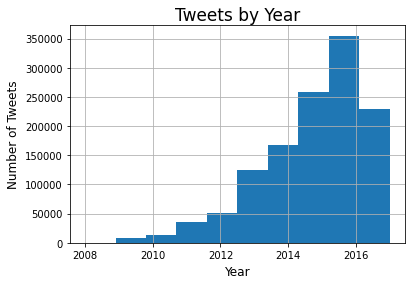

In [151]:
dj_1['year'].hist()
plt.title('Tweets by Year',fontsize=17,pad=5)
plt.xlabel("Year",fontsize=12,labelpad=5)
plt.ylabel("Number of Tweets",fontsize=12,labelpad=5)

In [22]:
dj_1['display_text_range'].value_counts()

[0, 140]     199704
[0, 139]      65081
[0, 144]      56314
[0, 138]      51636
[0, 137]      43808
              ...  
[30, 30]          1
[20, 72]          1
[25, 117]         1
[70, 80]          1
[32, 100]         1
Name: display_text_range, Length: 3784, dtype: int64

<AxesSubplot:>

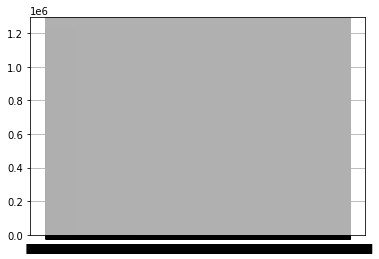

In [23]:
dj_1['display_text_range'].hist()

In [24]:
# dj_1['display_text_range'] = pd.to_numeric(dj_1['display_text_range'], errors='coerce')

In [25]:
# pd.qcut(dj_1['display_text_range'],q=10,duplicates='drop')
# pd.to_numeric(dj_1['display_text_range'][0])
# dj_1['display_text_range'][0]=dj_1['display_text_range'][0].replace("'", "")
# dj_1['display_text_range2']=dj_1['display_text_range'].str.replace("'", "")
# dj_1['display_text_range']

In [26]:
num2=dj_1['display_text_range'].apply(lambda st: st[st.find(" ")+1:st.find("]")])

In [27]:
num2=num2.astype(int)

In [28]:
num1=dj_1['display_text_range'].apply(lambda st: st[st.find("[")+1:st.find(",")])

In [29]:
num1=num1.astype(int)

In [30]:
dj_1['twlength']=num2-num1
dj_1['twlength']

0          140
1          119
2          115
3          120
4           29
          ... 
1243345    128
1243346    140
1243347    139
1243348    135
1243349    119
Name: twlength, Length: 1243350, dtype: int32

Text(0, 0.5, 'Number of Tweets')

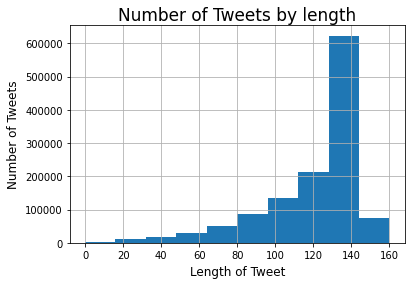

In [153]:
dj_1['twlength'].hist()
plt.title('Number of Tweets by length',fontsize=17,pad=5)
plt.xlabel("Length of Tweet",fontsize=12,labelpad=5)
plt.ylabel("Number of Tweets",fontsize=12,labelpad=5)

In [32]:
dj_1['entities'].value_counts() #metadata https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/object-model/entities
#difficult

{'hashtags': [], 'symbols': [], 'urls': [], 'user_mentions': []}                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         95804
{'hashtags': [], 'symbols': [], 'urls': [], 'user_mentions': [{'id': 301549400, 'id_str': '301549400', 'indices': [3, 19], 'name': 'House Appropriations', 'screen_name': 'HouseAppropsGOP'}, {'id': 550401754, 'id_str': '550401754', 'indices': [22, 35], 'name': 'Hal Rogers', 'screen_name': 'RepHalRogers'}]}       

In [33]:
dj_1['favorite_count'].value_counts()

0        476815
1        131063
2         89377
3         66397
4         50089
          ...  
12848         1
10803         1
15311         1
19007         1
6092          1
Name: favorite_count, Length: 10629, dtype: int64

<AxesSubplot:>

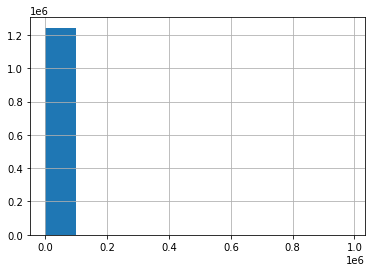

In [34]:
dj_1['favorite_count'].hist()

<AxesSubplot:>

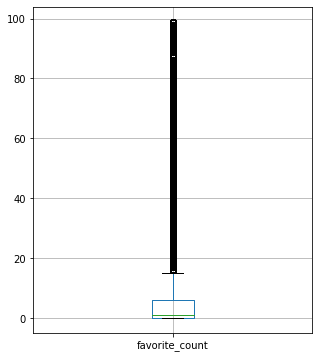

In [35]:
dj_1[dj_1['favorite_count']<100].boxplot(column='favorite_count',figsize=(5, 6))

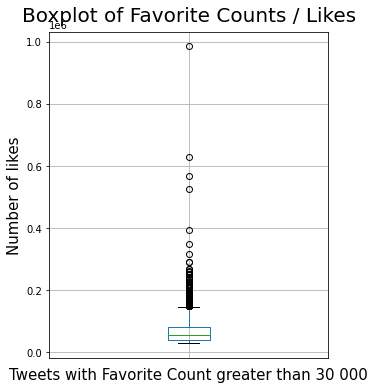

In [155]:
bplot=dj_1[dj_1['favorite_count']>30000].boxplot(column='favorite_count',figsize=(5, 6))
bplot.set_title('Boxplot of Favorite Counts / Likes',fontsize=20,pad=10)
bplot.set_ylabel('Number of likes',fontsize=15)
bplot.set_xlabel('Tweets with Favorite Count greater than 30 000',fontsize=15,labelpad=10)
bplot.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

In [37]:
dj_1['favorite_count'][dj_1['favorite_count']>30000].count()

1955

In [38]:
dj_1['favorite_count'][dj_1['favorite_count']<30000].count()

1241394

In [39]:
dj_1['favorite_count'][dj_1['favorite_count']<10].count()

951809

In [40]:
dj_1['decile']=pd.qcut(dj_1['favorite_count'],q=18,duplicates='drop')

In [41]:
favco=dj_1[['decile','favorite_count']]
favco

,decile,favorite_count
0,"(-0.001, 1.0]",0
1,"(-0.001, 1.0]",0
2,"(-0.001, 1.0]",0
3,"(-0.001, 1.0]",0
4,"(-0.001, 1.0]",0
...,...,...
1243345,"(3.0, 5.0]",5
1243346,"(-0.001, 1.0]",0
1243347,"(-0.001, 1.0]",0
1243348,"(-0.001, 1.0]",0


In [42]:
favco2=favco.groupby(by='decile').count()
favco2

,favorite_count
decile,
"(-0.001, 1.0]",607878
"(1.0, 2.0]",89377
"(2.0, 3.0]",66397
"(3.0, 5.0]",89317
"(5.0, 7.0]",57800
"(7.0, 10.0]",57131
"(10.0, 17.0]",72644
"(17.0, 32.0]",65799
"(32.0, 97.0]",68321


Text(0, 0.5, 'Decile')

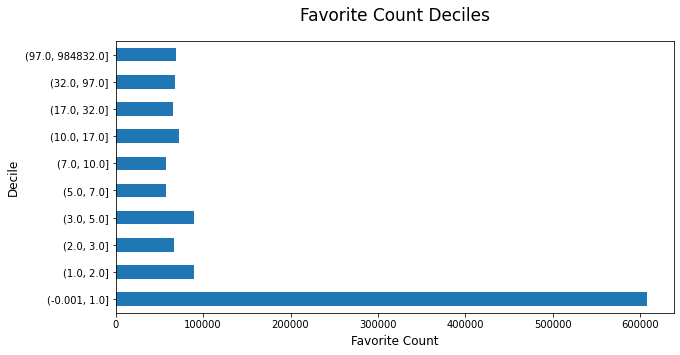

In [163]:
favco2.plot(kind='barh',figsize=(10,5),legend=None)
plt.title('Favorite Count Deciles',fontsize=17,pad=20)
plt.xlabel("Favorite Count",fontsize=12,labelpad=5)
plt.ylabel("Decile",fontsize=12,labelpad=5)

In [44]:
dj_1['favorited'].value_counts() #not quite (?)

False    1243332
True          18
Name: favorited, dtype: int64

In [45]:
dj_1['geo'].value_counts()  #again?

{'coordinates': [38.88976393, -77.00710168], 'type': 'Point'}    43
{'coordinates': [38.88973011, -77.00703621], 'type': 'Point'}    33
{'coordinates': [38.8868, -77.0105], 'type': 'Point'}            20
{'coordinates': [38.88675714, -77.00692892], 'type': 'Point'}    16
{'coordinates': [38.88694444, -77.00694444], 'type': 'Point'}    15
                                                                 ..
{'coordinates': [44.78850378, -68.77874768], 'type': 'Point'}     1
{'coordinates': [38.88549607, -77.00543095], 'type': 'Point'}     1
{'coordinates': [38.88850201, -77.00882346], 'type': 'Point'}     1
{'coordinates': [42.052588, -80.121157], 'type': 'Point'}         1
{'coordinates': [35.3655728, -80.7078083], 'type': 'Point'}       1
Name: geo, Length: 2436, dtype: int64

In [46]:
dj_1['id'].value_counts() 

481849974133886976    1
809447587447263237    1
756336766865448960    1
593081304549367808    1
166928195461980160    1
                     ..
757956848993574913    1
722471538583277568    1
175249009743626240    1
666704329491939328    1
527167454553075712    1
Name: id, Length: 1243350, dtype: int64

In [47]:
dj_1['id_str'].value_counts().count()

1243340

In [48]:
dj_1['id_str'].count()

1243350

In [49]:
dj_1['in_reply_to_screen_name'].value_counts() 

SenatorDurbin    1309
SenGillibrand    1011
SenFeinstein      798
RepMcGovern       753
SenBobCasey       736
                 ... 
resisthim           1
dantbarry           1
laurenscorza        1
mhuot_esq           1
GreerChamber        1
Name: in_reply_to_screen_name, Length: 26366, dtype: int64

In [50]:
dj_1['in_reply_to_status_id'].value_counts() 

5.909839e+17    150
8.575675e+17    100
8.413845e+17     52
8.468352e+17     12
4.412580e+17     11
               ... 
4.826271e+17      1
7.866801e+17      1
4.793733e+17      1
2.993271e+17      1
6.960542e+17      1
Name: in_reply_to_status_id, Length: 52132, dtype: int64

In [51]:
dj_1['in_reply_to_status_id'].iloc[60]

1061267982.0

In [52]:
(dj_1['in_reply_to_status_id']!= 0). sum()

1243350

In [53]:
dj_1['in_reply_to_status_id'][dj_1['in_reply_to_status_id'].notnull()]
#https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/object-model/tweet
#Nullable. If the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s ID. Example:

60         1.061268e+09
61         1.061242e+09
62         1.061462e+09
66         1.065467e+09
67         1.065393e+09
               ...     
1243340    8.721380e+17
1243341    8.721387e+17
1243343    8.721385e+17
1243344    8.721388e+17
1243347    8.721394e+17
Name: in_reply_to_status_id, Length: 54146, dtype: float64

In [54]:
#most tweets have a reply

In [55]:
dj_1['in_reply_to_status_id_str'].value_counts()  #id again

5.909839e+17    150
8.575675e+17    100
8.413845e+17     52
8.468352e+17     12
4.412580e+17     11
               ... 
4.826271e+17      1
7.866801e+17      1
4.793733e+17      1
2.993271e+17      1
6.960542e+17      1
Name: in_reply_to_status_id_str, Length: 52132, dtype: int64

In [56]:
dj_1['in_reply_to_user_id'].value_counts() #id again

2.473346e+08    1309
7.219881e+07    1011
4.762569e+08     798
2.424261e+08     753
1.715987e+08     736
                ... 
1.564655e+07       1
1.564784e+07       1
2.503760e+08       1
4.006069e+09       1
5.368844e+08       1
Name: in_reply_to_user_id, Length: 26364, dtype: int64

In [57]:
dj_1['in_reply_to_user_id_str'].value_counts()  #id again

2.473346e+08    1309
7.219881e+07    1011
4.762569e+08     798
2.424261e+08     753
1.715987e+08     736
                ... 
1.564655e+07       1
1.564784e+07       1
2.503760e+08       1
4.006069e+09       1
5.368844e+08       1
Name: in_reply_to_user_id_str, Length: 26364, dtype: int64

In [58]:
dj_1['is_quote_status'].value_counts() #whether tweet is quote

False    1186039
True       57311
Name: is_quote_status, dtype: int64

In [59]:
dj_1['lang'].value_counts()[:10]

en     1226930
und       8137
es        5108
fr         674
in         346
ro         261
tl         245
de         223
et         205
pl         183
Name: lang, dtype: int64

In [60]:
dj_1['place'].value_counts()[:3] #good , city and such

{'attributes': {}, 'bounding_box': {'coordinates': [[[-77.119401, 38.801826], [-76.909396, 38.801826], [-76.909396, 38.9953797], [-77.119401, 38.9953797]]], 'type': 'Polygon'}, 'contained_within': [], 'country': 'United States', 'country_code': 'US', 'full_name': 'Washington, DC', 'id': '01fbe706f872cb32', 'name': 'Washington', 'place_type': 'city', 'url': 'https://api.twitter.com/1.1/geo/id/01fbe706f872cb32.json'}    9820
{'attributes': {}, 'bounding_box': {'coordinates': [[[-102.051769, 36.9931101], [-94.588081, 36.9931101], [-94.588081, 40.003282], [-102.051769, 40.003282]]], 'type': 'Polygon'}, 'contained_within': [], 'country': 'United States', 'country_code': 'US', 'full_name': 'Kansas, USA', 'id': '27c45d804c777999', 'name': 'Kansas', 'place_type': 'admin', 'url': 'https://api.twitter.com/1.1/geo/id/27c45d804c777999.json'}         412
{'attributes': {}, 'bounding_box': {'coordinates': [[[-83.67529, 36.540739], [-75.16644, 36.540739], [-75.16644, 39.466012], [-83.67529, 39.466012

In [61]:
dj_1['retweet_count'].value_counts() #how often retweeted

1        182803
0        170796
2        150120
3        114079
4         85205
          ...  
20944         1
9088          1
2523          1
8670          1
9719          1
Name: retweet_count, Length: 9308, dtype: int64

<AxesSubplot:>

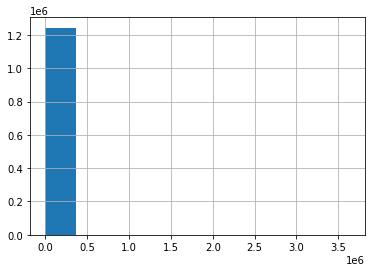

In [62]:
dj_1['retweet_count'].hist()

In [63]:
dj_1['decile2']=pd.qcut(dj_1['retweet_count'],q=18,duplicates='drop')

In [64]:
retco=dj_1[['decile','retweet_count']]
retco

,decile,retweet_count
0,"(-0.001, 1.0]",0
1,"(-0.001, 1.0]",0
2,"(-0.001, 1.0]",0
3,"(-0.001, 1.0]",0
4,"(-0.001, 1.0]",0
...,...,...
1243345,"(3.0, 5.0]",2
1243346,"(-0.001, 1.0]",1
1243347,"(-0.001, 1.0]",1
1243348,"(-0.001, 1.0]",0


In [65]:
retco2=retco.groupby(by='decile').count()
retco2

,retweet_count
decile,
"(-0.001, 1.0]",607878
"(1.0, 2.0]",89377
"(2.0, 3.0]",66397
"(3.0, 5.0]",89317
"(5.0, 7.0]",57800
"(7.0, 10.0]",57131
"(10.0, 17.0]",72644
"(17.0, 32.0]",65799
"(32.0, 97.0]",68321


<AxesSubplot:xlabel='decile'>

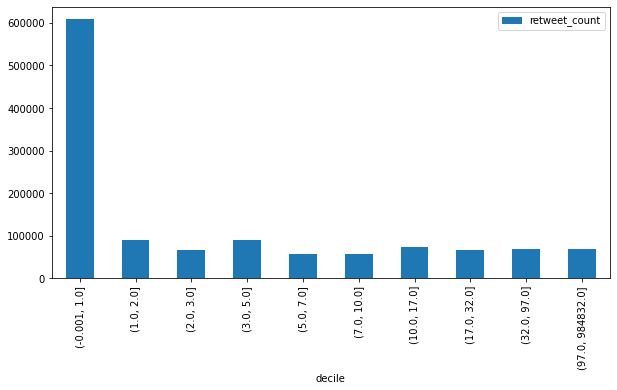

In [66]:
retco2.plot(kind='bar',figsize=(10,5))

In [67]:
dj_1['retweeted'].value_counts() #none of it retweeted? really???

False    1243350
Name: retweeted, dtype: int64

In [68]:
dj_1['retweeted'][:10]

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: retweeted, dtype: bool

In [69]:
dj_1['screen_name'][:10] #who tweeets the most? are the tweets from the most tweeters...?

0      JeffFlake
1      JeffFlake
2      JeffFlake
3      JeffFlake
4    JohnBoozman
5      JeffFlake
6    JohnBoozman
7      JeffFlake
8      JeffFlake
9      JeffFlake
Name: screen_name, dtype: object

In [70]:
dj_1['screen_name'].value_counts()

RepDonBeyer       3258
SenatorDurbin     3252
MassGovernor      3250
GovMattBevin      3250
SenTomCotton      3249
                  ... 
collinpeterson      80
Rep_Matt_Gaetz      37
RepRonEstes         27
RepGonzalez         16
GregHarper           4
Name: screen_name, Length: 545, dtype: int64

In [71]:
dj_1['source'].value_counts() #??

<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                                                   563405
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>                                  255174
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                                   248476
<a href="http://www.hootsuite.com" rel="nofollow">Hootsuite</a>                                                       47142
<a href="http://www.facebook.com/twitter" rel="nofollow">Facebook</a>                                                 18275
                                                                                                                      ...  
<a href="https://itunes.apple.com/us/app/pilotonline/id537988905?mt=8&uo=4" rel="nofollow">PilotOnline on iOS</a>         1
<a href="http://grijalva.house.gov/" rel="nofollow">RepresentativeRaulGrijalva</a>                                        1
<a href=

In [72]:
dj_1['text'][:10] #do text analysis with it! more liberal or not? critizing or promoting?

0    I'd tell you to hide your wallet, but it's pro...
1    Will be heading the the conservative bloggers ...
2    I'm speaking on the floor shortly to in opposi...
3    I'm speaking on the floor shortly to in opposi...
4                        Attending a Whip Team meeting
5    headed to floor right now to speak against def...
6    Voting- Ordering the Previous Question on the ...
7    For the first time, earmarks were a prominent ...
8    For the first time, earmarks were a prominent ...
9    I'm speaking on House floor soon opposing bail...
Name: text, dtype: object

In [73]:
dj_1['truncated'].value_counts() #none truncated ...just omit

False    1243350
Name: truncated, dtype: int64

In [74]:
dj_1['user_id'][:10] #good to track maybe

0    16056306
1    16056306
2    16056306
3    16056306
4     5558312
5    16056306
6     5558312
7    16056306
8    16056306
9    16056306
Name: user_id, dtype: int64

In [75]:
dj_1['possibly_sensitive'].value_counts() #wow there is something to examine

0.0    769236
1.0       944
Name: possibly_sensitive, dtype: int64

In [76]:
dj_1['extended_entities'].count() #=non nan values #=if it has more media like pics ...can you display? 
#more retweets if it has extended media?

298040

In [77]:
dict_ext=dj_1['extended_entities'].value_counts()[:1]

In [78]:
dict_ext.dtype

dtype('int64')

In [79]:
dj_1['quoted_status_id'].count() #=not many tweets quoted...veyr interesting to analyze these

56418

In [80]:
dj_1['quoted_status_id_str'].value_counts() # ids again

8.592532e+17    47
8.396258e+17    31
7.511983e+17    31
8.645923e+17    29
8.642245e+17    29
                ..
6.746348e+17     1
8.548851e+17     1
6.394825e+17     1
8.191880e+17     1
6.243207e+17     1
Name: quoted_status_id_str, Length: 50238, dtype: int64

In [81]:
dj_1['withheld_copyright'].value_counts() #would omit

1.0    1
Name: withheld_copyright, dtype: int64

In [82]:
dj_1['withheld_in_countries'].value_counts() #omit

['XY']    1
Name: withheld_in_countries, dtype: int64

In [83]:
dj_1['withheld_scope'].value_counts() #omit

status    1
Name: withheld_scope, dtype: int64

# week 2

In [84]:
user_gp=dj_1[['screen_name','user_id','id']].groupby(['user_id', 'screen_name']).count()
user_gp=user_gp.sort_values('id', ascending=False)
user_gp

,,id
user_id,screen_name,
2962868158,RepDonBeyer,3258
247334603,SenatorDurbin,3252
3141213592,GovMattBevin,3250
18023868,MassGovernor,3250
968650362,SenTomCotton,3249
...,...,...
115676070,collinpeterson,80
510196665,Rep_Matt_Gaetz,37
854715071116849157,RepRonEstes,27


In [85]:
# dj_1.loc[dj_1['user_id']==2962868158]

In [86]:
u_gp_avg=dj_1[['screen_name','user_id','id','twlength']].groupby(['user_id', 'screen_name']).agg(['mean', 'count'])
# u_gp_avg=u_gp_avg.sort_values('count', ascending=False)
u_gp_avg

id          twlength      
                                                 mean count        mean count
user_id            screen_name                                               
5558312            JohnBoozman     502154708618452480  3123  120.089657  3123
7270292            JimInhofe       665574926659835136  1020  121.725490  1020
7429102            MarkWarner      574635008494959232  3204  121.390137  3204
10615232           ChuckGrassley   644170715045628672  3239  108.196048  3239
11651202           SteveDaines     722178621769094912  3233  110.574389  3233
...                                               ...   ...         ...   ...
818536152588238849 RepGonzalez     859735088471151616    16  111.312500    16
818975124460335106 RepDonBacon     851706376741872000   610  112.724590   610
822215679726100480 POTUS           844400524153100160   641  114.007800   641
827279765287559171 RepMikeJohnson  847848346929883008   189  123.063492   189
854715071116849157 RepRonEstes     863592013048001280    27  117.259259    27

[545 rows x 4 columns]

In [87]:
from pandasql import sqldf, load_meat, load_births

In [88]:
pysqldf=lambda q: sqldf(q,globals())

In [89]:
dj_2=dj_1[:2]
dj_2=dj_2[['year','twlength']]
dj_2

,year,twlength
0,2008,140
1,2008,119


In [90]:
# pysqldf = lambda q: sqldf(q, globals())
# meat = load_meat()
# births = load_births()
# print(pysqldf("SELECT * FROM meat LIMIT 10;").head())

In [91]:
%%time
# display(pysqldf("Select count(*) from dj_2;",globals()))
pysqldf("SELECT * FROM dj_2;")#forgot the py in pysqldf.........!!!!!!!!!!!!

Wall time: 15.7 ms


,year,twlength
0,2008,140
1,2008,119


In [92]:
dj_3=dj_1[['screen_name','user_id','id','twlength']]

In [93]:
# %%time
# pysqldf("SELECT 'user_id' FROM dj_3 Limit 10;") #<--wrong, user_id withouth quotation!!

In [94]:
%%time
sq_tcnt=pysqldf("""SELECT user_id, screen_name, 
count(*) as cnt FROM dj_3  GROUP BY user_id, screen_name ORDER BY cnt desc ;""")
sq_tcnt

Wall time: 9.17 s


,user_id,screen_name,cnt
0,2962868158,RepDonBeyer,3258
1,247334603,SenatorDurbin,3252
2,18023868,MassGovernor,3250
3,3141213592,GovMattBevin,3250
4,14845376,GrahamBlog,3249
...,...,...,...
540,115676070,collinpeterson,80
541,510196665,Rep_Matt_Gaetz,37
542,854715071116849157,RepRonEstes,27
543,818536152588238849,RepGonzalez,16


In [95]:
sq_avt=pysqldf("""SELECT user_id, 
AVG(twlength) as avg FROM dj_3  GROUP BY user_id;""")
sq_avt.rename({'user_id':'user_id2'},axis=1,inplace=True)
sq_avt

,user_id2,avg
0,5558312,120.089657
1,7270292,121.725490
2,7429102,121.390137
3,10615232,108.196048
4,11651202,110.574389
...,...,...
540,818536152588238849,111.312500
541,818975124460335106,112.724590
542,822215679726100480,114.007800
543,827279765287559171,123.063492


In [96]:
sq_c_a=pysqldf("""SELECT * from sq_tcnt as c JOIN sq_avt as a on c.user_id=a.user_id2;""")
sq_c_a

,user_id,screen_name,cnt,user_id2,avg
0,2962868158,RepDonBeyer,3258,2962868158,128.334254
1,247334603,SenatorDurbin,3252,247334603,128.024908
2,18023868,MassGovernor,3250,18023868,134.096308
3,3141213592,GovMattBevin,3250,3141213592,108.053846
4,14845376,GrahamBlog,3249,14845376,111.831025
...,...,...,...,...,...
540,115676070,collinpeterson,80,115676070,121.212500
541,510196665,Rep_Matt_Gaetz,37,510196665,100.972973
542,854715071116849157,RepRonEstes,27,854715071116849157,117.259259
543,818536152588238849,RepGonzalez,16,818536152588238849,111.312500


In [97]:
sq_c_a.drop(sq_c_a.columns[3], axis=1, inplace=True)
sq_c_a

,user_id,screen_name,cnt,avg
0,2962868158,RepDonBeyer,3258,128.334254
1,247334603,SenatorDurbin,3252,128.024908
2,18023868,MassGovernor,3250,134.096308
3,3141213592,GovMattBevin,3250,108.053846
4,14845376,GrahamBlog,3249,111.831025
...,...,...,...,...
540,115676070,collinpeterson,80,121.212500
541,510196665,Rep_Matt_Gaetz,37,100.972973
542,854715071116849157,RepRonEstes,27,117.259259
543,818536152588238849,RepGonzalez,16,111.312500


In [98]:
len1=sq_c_a[:20]

In [99]:
print(len1["avg"].mean())
print(len1["cnt"].mean())

121.27182240614938
3247.85


In [100]:
len2=sq_c_a[20:]
print(len2["avg"].mean())
print(len2["cnt"].mean())

119.89348643657829
2244.558095238095


In [101]:
corr, _ = pearsonr(sq_c_a['cnt'], sq_c_a['avg'])
print('Pearson correlation: %.3f' % corr)

Pearson correlation: 0.156


In [102]:
sq_c_a.describe()

,user_id,cnt,avg
count,5.450000e+02,545.000000,545.000000
mean,7.131135e+16,2281.376147,119.944068
std,2.297616e+17,1057.006476,7.427978
min,5.558312e+06,4.000000,73.750000
25%,5.686409e+07,1398.000000,115.987928
50%,2.467691e+08,2691.000000,120.864738
75%,1.206227e+09,3222.000000,124.860706
max,8.547151e+17,3258.000000,136.171840


In [103]:
dj_4=dj_1[['screen_name','user_id','id','favorite_count']]

In [104]:
%%time

sq_fcnt0=pysqldf("""SELECT user_id, screen_name, count(*) as cnt
                FROM dj_4 
                Group by user_id,screen_name
                ORDER BY cnt desc  """)
sq_fcnt0
               

Wall time: 8.82 s


,user_id,screen_name,cnt
0,2962868158,RepDonBeyer,3258
1,247334603,SenatorDurbin,3252
2,18023868,MassGovernor,3250
3,3141213592,GovMattBevin,3250
4,14845376,GrahamBlog,3249
...,...,...,...
540,115676070,collinpeterson,80
541,510196665,Rep_Matt_Gaetz,37
542,854715071116849157,RepRonEstes,27
543,818536152588238849,RepGonzalez,16


In [105]:
%%time

# sq_fcnt=pysqldf("""SELECT user_id, screen_name, favorite_count
#                 FROM dj_4 
#                 Group by user_id
#                 ORDER BY favorite_count desc""")
sq_fsum=pysqldf("""SELECT user_id, sum(favorite_count) as fsum
                FROM dj_4 
                Group by user_id
                ORDER BY fsum desc""")
sq_fsum.rename({'user_id':'user_id3'},axis=1,inplace=True)
sq_fsum

Wall time: 8.18 s


,user_id3,fsum
0,25073877,137775878
1,29442313,33039433
2,822215679726100480,9559858
3,970207298,8442047
4,29501253,3917791
...,...,...
540,854715071116849157,383
541,115676070,109
542,818536152588238849,47
543,510196665,0


<AxesSubplot:>

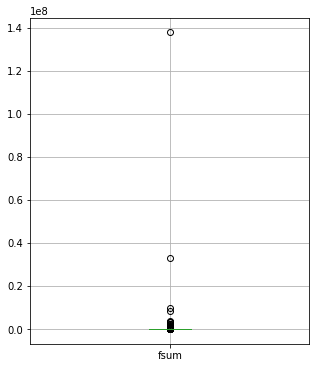

In [106]:
sq_fsum.boxplot(column='fsum',figsize=(5, 6))

<AxesSubplot:>

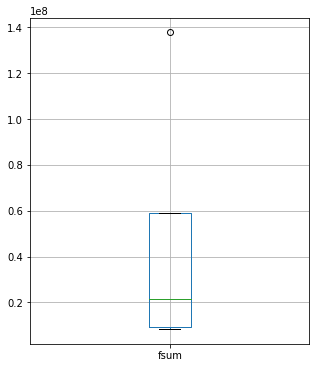

In [107]:
sq_fsum[sq_fsum['fsum']>5000000].boxplot(column='fsum',figsize=(5, 6))

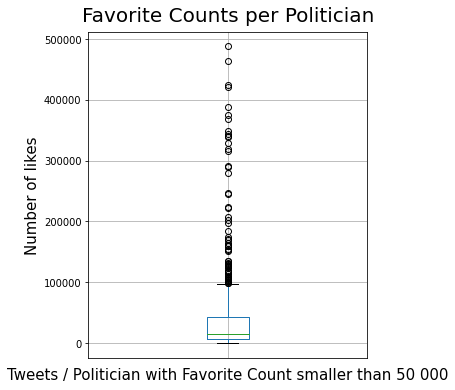

In [164]:
bplot=sq_fsum[sq_fsum['fsum']<500000].boxplot(column='fsum',figsize=(5, 6))
bplot.set_title('Favorite Counts per Politician',fontsize=20,pad=10)
bplot.set_ylabel('Number of likes',fontsize=15)
bplot.set_xlabel('Tweets / Politician with Favorite Count smaller than 50 000',fontsize=15,labelpad=10)
bplot.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

In [109]:
sanders=dj_4[dj_4['user_id']==29442313]
# sanders

In [110]:
sanders['favorite_count'].sum()

33039433

In [111]:
pysqldf("""SELECT *, fsum/cnt as fpertw 
                FROM sq_fcnt0 as o
                JOIN sq_fsum as s
                ON o.user_id=s.user_id3
                Group by user_id
                ORDER BY fpertw desc""")


,user_id,screen_name,cnt,user_id3,fsum,fpertw
0,25073877,realDonaldTrump,3238,25073877,137775878,42549
1,822215679726100480,POTUS,641,822215679726100480,9559858,14913
2,29442313,SenSanders,3243,29442313,33039433,10187
3,970207298,SenWarren,2027,970207298,8442047,4164
4,36686040,MaxineWaters,2253,36686040,3225758,1431
...,...,...,...,...,...,...
540,82453460,BennieGThompson,752,82453460,700,0
541,25086658,congbillposey,1227,25086658,1099,0
542,23970171,TomRooney,2730,23970171,2102,0
543,20334348,GregHarper,4,20334348,0,0


In [112]:
sq_fav=pysqldf("""SELECT *, fsum/cnt as fpertw 
                FROM sq_fcnt0 as o
                JOIN sq_fsum as s
                ON o.user_id=s.user_id3
                Group by user_id
                ORDER BY cnt desc""")

sq_fav

,user_id,screen_name,cnt,user_id3,fsum,fpertw
0,2962868158,RepDonBeyer,3258,2962868158,343939,105
1,247334603,SenatorDurbin,3252,247334603,387862,119
2,3141213592,GovMattBevin,3250,3141213592,154743,47
3,18023868,MassGovernor,3250,18023868,93557,28
4,968650362,SenTomCotton,3249,968650362,152724,47
...,...,...,...,...,...,...
540,115676070,collinpeterson,80,115676070,109,1
541,510196665,Rep_Matt_Gaetz,37,510196665,0,0
542,854715071116849157,RepRonEstes,27,854715071116849157,383,14
543,818536152588238849,RepGonzalez,16,818536152588238849,47,2


In [113]:
sq_fav[['cnt','fsum','fpertw']].describe()

,cnt,fsum,fpertw
count,545.000000,5.450000e+02,545.000000
mean,2281.376147,4.582256e+05,173.955963
std,1057.006476,6.095455e+06,1987.969030
min,4.000000,0.000000e+00,0.000000
25%,1398.000000,6.412000e+03,4.000000
50%,2691.000000,1.653300e+04,8.000000
75%,3222.000000,5.216300e+04,21.000000
max,3258.000000,1.377759e+08,42549.000000


In [114]:
lenf1=sq_fav[:20]
lenf1['fpertw'].mean()

79.3

In [115]:
lenf2=sq_fav[20:]
lenf2['fpertw'].mean()

177.56190476190477

In [165]:
corr, _ = pearsonr(sq_fav['cnt'], sq_fav['fpertw'])
print('Pearson correlation: %.3f' % corr)

Pearson correlation: 0.029


actually the ones who are tweeting less often get more 'favorites'

now retweets

In [116]:
dj_5=dj_1[['screen_name','user_id','id','retweet_count']]

In [117]:
sq_rsum=pysqldf("""SELECT user_id, sum(retweet_count) as rsum
                FROM dj_5 
                Group by user_id
                ORDER BY rsum desc""")
sq_rsum.rename({'user_id':'user_id4'},axis=1,inplace=True)
sq_rsum

,user_id4,rsum
0,25073877,40852446
1,29442313,13332027
2,822215679726100480,5855933
3,15745368,4964220
4,816282029276938240,4896177
...,...,...
540,811986281177772032,349
541,115676070,208
542,854715071116849157,88
543,818536152588238849,43


In [118]:
sq_retw=pysqldf("""SELECT *, rsum/cnt as rpertw 
                FROM sq_fcnt0 as o
                JOIN sq_rsum as r
                ON o.user_id=r.user_id4
                Group by user_id
                ORDER BY cnt desc""")

sq_retw

,user_id,screen_name,cnt,user_id4,rsum,rpertw
0,2962868158,RepDonBeyer,3258,2962868158,4809746,1476
1,247334603,SenatorDurbin,3252,247334603,497996,153
2,3141213592,GovMattBevin,3250,3141213592,142384,43
3,18023868,MassGovernor,3250,18023868,64932,19
4,968650362,SenTomCotton,3249,968650362,85473,26
...,...,...,...,...,...,...
540,115676070,collinpeterson,80,115676070,208,2
541,510196665,Rep_Matt_Gaetz,37,510196665,646,17
542,854715071116849157,RepRonEstes,27,854715071116849157,88,3
543,818536152588238849,RepGonzalez,16,818536152588238849,43,2


In [119]:
lenr1=sq_retw[:20]
lenr1['rpertw'].mean()

177.0

In [120]:
lenr2=sq_retw[20:]
lenr2['rpertw'].mean()

190.46666666666667

In [166]:
corr, _ = pearsonr(sq_retw['cnt'], sq_retw['rpertw'])
print('Pearson correlation: %.3f' % corr)

Pearson correlation: -0.001


In [121]:
sq_retw.describe()

,user_id,cnt,user_id4,rsum,rpertw
count,5.450000e+02,545.000000,5.450000e+02,5.450000e+02,545.000000
mean,7.131135e+16,2281.376147,7.131135e+16,4.336118e+05,189.972477
std,2.297616e+17,1057.006476,2.297616e+17,1.968585e+06,795.886221
min,5.558312e+06,4.000000,5.558312e+06,1.000000e+00,0.000000
25%,5.686409e+07,1398.000000,5.686409e+07,2.154100e+04,11.000000
50%,2.467691e+08,2691.000000,2.467691e+08,6.853800e+04,33.000000
75%,1.206227e+09,3222.000000,1.206227e+09,2.921580e+05,118.000000
max,8.547151e+17,3258.000000,8.547151e+17,4.085245e+07,12616.000000


well changed to : politicians that quote more, also tweet more

In [122]:
dj_6=dj_1[['screen_name','user_id','id','is_quote_status']]

In [123]:
dj_6['is_quote_status'].dtype

dtype('bool')

In [124]:
dj_6['is_quote_status'].sum()

57311

In [125]:
sq_qsum=pysqldf("""SELECT user_id, sum(is_quote_status) as qu
                FROM dj_6
                Group by user_id
                ORDER BY qu desc""")
sq_qsum.rename({'user_id':'user_id5'},axis=1,inplace=True)
sq_qsum

,user_id5,qu
0,2962868158,1111
1,15808765,890
2,2963445730,665
3,233842454,638
4,1880674038,636
...,...,...
540,75785294,0
541,57963724,0
542,20597460,0
543,20334348,0


In [126]:
dj_6['is_quote_status'].value_counts()

False    1186039
True       57311
Name: is_quote_status, dtype: int64

In [127]:
# sq_qsum1=dj_1[['screen_name','user_id','is_quote_status']].groupby(['user_id', 'screen_name']).count()
# sq_qsum1

In [128]:
# sq_qsum1=sq_qsum1.sort_values('is_quote_status', ascending=False)
# sq_qsum1

In [129]:
sq_qu=pysqldf("""SELECT *, qu/cnt as qpercnt
                FROM sq_fcnt0 as o
                JOIN sq_qsum as q
                ON o.user_id=q.user_id5
                Group by user_id
                ORDER BY cnt desc""")
sq_qu['qpercnt']=sq_qu['qu']/sq_qu['cnt']
sq_qu

,user_id,screen_name,cnt,user_id5,qu,qpercnt
0,2962868158,RepDonBeyer,3258,2962868158,1111,0.341007
1,247334603,SenatorDurbin,3252,247334603,240,0.073801
2,3141213592,GovMattBevin,3250,3141213592,422,0.129846
3,18023868,MassGovernor,3250,18023868,165,0.050769
4,968650362,SenTomCotton,3249,968650362,54,0.016620
...,...,...,...,...,...,...
540,115676070,collinpeterson,80,115676070,0,0.000000
541,510196665,Rep_Matt_Gaetz,37,510196665,1,0.027027
542,854715071116849157,RepRonEstes,27,854715071116849157,4,0.148148
543,818536152588238849,RepGonzalez,16,818536152588238849,0,0.000000


In [130]:
lenq1=sq_qu[:20]
lenq1['qpercnt'].mean()

0.0741116482498236

In [131]:
lenq2=sq_qu[20:]
lenq2['qpercnt'].mean()

0.046184081646966794

In [170]:
corr, _ = pearsonr(sq_qu['cnt'], sq_qu['qpercnt'])
print('Pearson correlation: %.3f' % corr)

Pearson correlation: -0.050


In [132]:
dj_7=dj_1[['screen_name','user_id','id','favorite_count','extended_entities']]

In [133]:
dj_7.head()

,screen_name,user_id,id,favorite_count,extended_entities
0,JeffFlake,16056306,930546663,0,NaN
1,JeffFlake,16056306,931746104,0,NaN
2,JeffFlake,16056306,931747655,0,NaN
3,JeffFlake,16056306,931748572,0,NaN
4,JohnBoozman,5558312,932162206,0,NaN


In [134]:
# dj_7['media']=1 if dj_7['extended_entities']!='Nan' else 0

In [135]:
dj_7['extended_entities']=dj_7['extended_entities'].astype(str)

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [136]:
# dj_7['media'] = np.where(np.isnan(dj_7['extended_entities']) ==False, 0,1)
dj_7['media'] = np.where(dj_7['extended_entities'] =='nan', 0,1)
# dj_7['media'] = dj_7.apply(
#     lambda x: 0 if np.isnan(x['media']) else 1,
#     axis=1
# )
# dj_7['media'] = dj_7.apply(
#     lambda x: 0 if np.isnan(x['extended_entities']) else 1,
#     axis=1
# )

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [137]:
dj_7.head()

,screen_name,user_id,id,favorite_count,extended_entities,media
0,JeffFlake,16056306,930546663,0,nan,0
1,JeffFlake,16056306,931746104,0,nan,0
2,JeffFlake,16056306,931747655,0,nan,0
3,JeffFlake,16056306,931748572,0,nan,0
4,JohnBoozman,5558312,932162206,0,nan,0


In [138]:
dj_7['media'].value_counts()

0    945310
1    298040
Name: media, dtype: int64

In [139]:
corr, _ = pearsonr(dj_7['favorite_count'], dj_7['media'])
print('Pearson correlation: %.3f' % corr)

Pearson correlation: -0.002


In [140]:
# dj_7.iloc[70000]['extended_entities']

In [141]:
# np.isnull(dj_7['extended_entities'])

In [142]:
dj_7.drop(dj_7.columns[4], axis=1, inplace=True)

C:\ProgramData\Miniconda3\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [143]:
dj_7.head()

,screen_name,user_id,id,favorite_count,media
0,JeffFlake,16056306,930546663,0,0
1,JeffFlake,16056306,931746104,0,0
2,JeffFlake,16056306,931747655,0,0
3,JeffFlake,16056306,931748572,0,0
4,JohnBoozman,5558312,932162206,0,0


In [144]:
dj_7b=dj_7[['favorite_count', 'media']]

In [145]:
dj_7b.groupby(['media']).sum()

,favorite_count
media,
0,193365937
1,56367021


In [146]:
dj_7b['favorite_count'].sum()

249732958

In [147]:
193365937/56367021

3.4304799787095366

In [148]:
dj_8=dj_1[['screen_name','user_id','id','favorite_count','possibly_sensitive']]

In [149]:
sq_psum=pysqldf("""SELECT user_id,screen_name,sum(possibly_sensitive) as ps
                FROM dj_8
                Group by user_id,screen_name
                ORDER BY ps desc""")
# sq_qsum.rename({'user_id':'user_id5'},axis=1,inplace=True)
sq_psum

,user_id,screen_name,ps
0,236279233,NormaJTorres,832.0
1,1074412920,RepPaulCook,110.0
2,240427862,RepMcKinley,1.0
3,584012853,RepDLamborn,1.0
4,5558312,JohnBoozman,0.0
...,...,...,...
540,818975124460335106,RepDonBacon,0.0
541,822215679726100480,POTUS,0.0
542,827279765287559171,RepMikeJohnson,0.0
543,854715071116849157,RepRonEstes,0.0


In [150]:
# NOt much to exerise for possibly sensitive